In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
games = pd.read_csv('data/team_data_v4.csv')
X = games.iloc[:, 3:14]
y = games.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [14]:
games

Unnamed: 0            home_team              away_team  home_shots_prop  \
0              0  Toronto Maple Leafs        Ottawa Senators         0.596154   
1              1  Philadelphia Flyers          Boston Bruins         0.467742   
2              2  Toronto Maple Leafs        Ottawa Senators         0.450980   
3              3      Arizona Coyotes        St. Louis Blues         0.400000   
4              4  Pittsburgh Penguins  Columbus Blue Jackets         0.539683   
...          ...                  ...                    ...              ...   
1328        1328  Pittsburgh Penguins    Philadelphia Flyers         0.476923   
1329        1329        Winnipeg Jets      New Jersey Devils         0.450000   
1330        1330  Toronto Maple Leafs      Detroit Red Wings         0.642857   
1331        1331    Vancouver Canucks      Los Angeles Kings         0.490196   
1332        1332       Calgary Flames          Anaheim Ducks         0.640625   

      away_shots_prop  home_corsi_prop  away_corsi_prop  home_fenwick_prop  \
0            0.384615         0.511111         0.477778           0.567568   
1            0.516129         0.446429         0.544643           0.425287   
2            0.529412         0.469388         0.520408           0.493333   
3            0.500000         0.400000         0.500000           0.400000   
4            0.444444         0.528000         0.464000           0.549451   
...               ...              ...              ...                ...   
1328         0.507692         0.533333         0.458333           0.467391   
1329         0.533333         0.504425         0.486726           0.423529   
1330         0.342857         0.544715         0.447154           0.593750   
1331         0.490196         0.528846         0.461538           0.513514   
1332         0.343750         0.591667         0.400000           0.670213   

      away_fenwick_prop  home_penalties_prop  away_penalties_prop  \
0              0.418919             0.375000             0.500000   
1              0.563218             0.500000             0.450000   
2              0.493333             0.428571             0.428571   
3              0.500000             0.000000             0.000000   
4              0.439560             0.500000             0.375000   
...                 ...                  ...                  ...   
1328           0.521739             0.562500             0.375000   
1329           0.564706             0.375000             0.500000   
1330           0.395833             0.333333             0.555556   
1331           0.472973             0.285714             0.571429   
1332           0.319149             0.250000             0.500000   

      home_hits_prop  away_hits_prop  home_takeaways_prop  \
0           0.392405        0.594937             0.727273   
1           0.462687        0.522388             0.500000   
2           0.397436        0.589744             0.470588   
3           0.000000        0.000000             0.000000   
4           0.565789        0.421053             0.625000   
...              ...             ...                  ...   
1328        0.483333        0.500000             0.500000   
1329        0.629630        0.333333             0.562500   
1330        0.555556        0.425926             0.500000   
1331        0.465517        0.517241             0.428571   
1332        0.500000        0.470588             0.352941   

      away_takeaways_prop  game_end  
0                0.181818  home win  
1                0.428571  home win  
2                0.470588  away win  
3                0.000000  away win  
4                0.312500  home win  
...                   ...       ...  
1328             0.461538  home win  
1329             0.375000  home win  
1330             0.437500  away win  
1331             0.428571  away win  
1332             0.588235  home win  

[1333 rows x 16 columns]

In [66]:
games.home_team.unique()

array(['Toronto Maple Leafs', 'Philadelphia Flyers', 'Arizona Coyotes',
       'Pittsburgh Penguins', 'Washington Capitals', 'Minnesota Wild',
       'Edmonton Oilers', 'Vancouver Canucks', 'San Jose Sharks',
       'Columbus Blue Jackets', 'Calgary Flames', 'Colorado Avalanche',
       'Nashville Predators', 'Montréal Canadiens', 'New York Rangers',
       'Dallas Stars', 'Seattle Kraken', 'Vegas Golden Knights',
       'New Jersey Devils', 'Boston Bruins', 'Buffalo Sabres',
       'Carolina Hurricanes', 'Winnipeg Jets', 'Chicago Blackhawks',
       'Detroit Red Wings', 'Anaheim Ducks', 'Los Angeles Kings',
       'Florida Panthers', 'Tampa Bay Lightning', 'St. Louis Blues',
       'Ottawa Senators', 'New York Islanders', 'SC Bern',
       'Eisbaren Berlin', 'Team Central', 'Team Atlantic'], dtype=object)

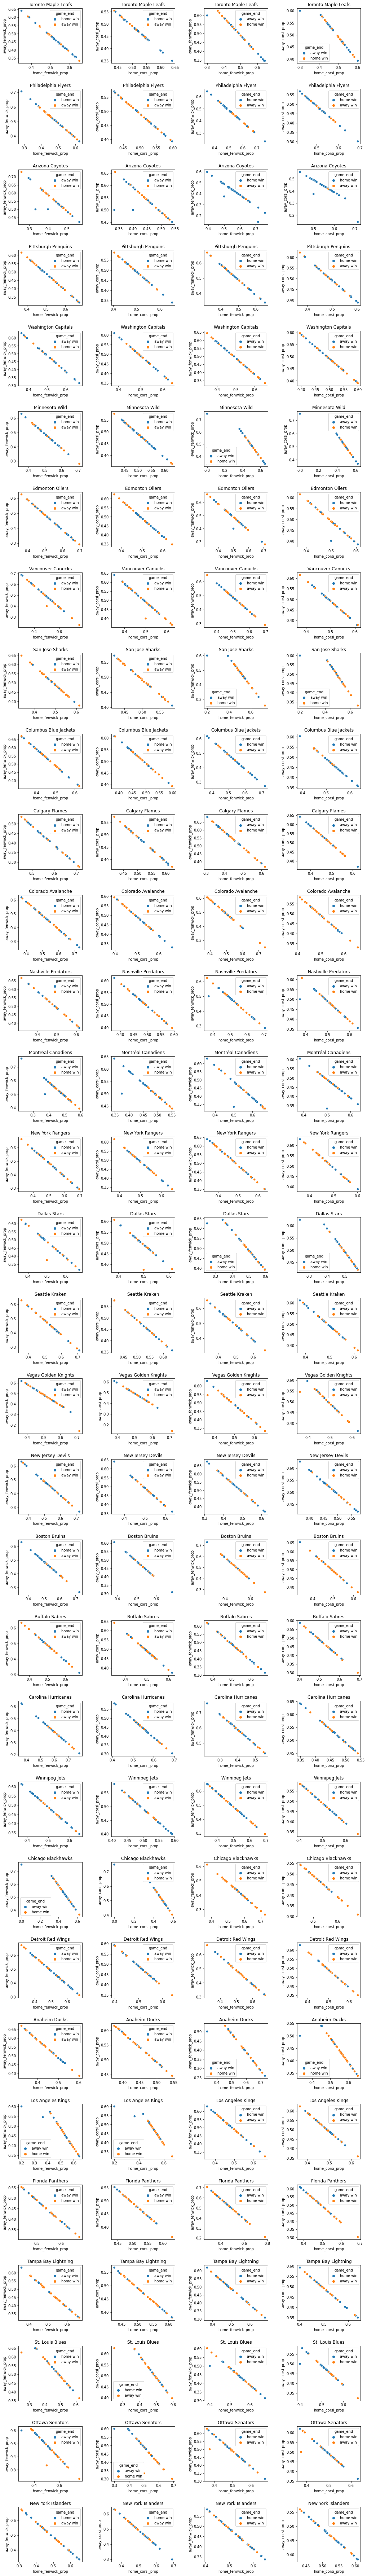

In [99]:
teams = list(games.home_team.unique())[:-4]
fig, axes = plt.subplots(32, 4, figsize=(15,100))
fig.tight_layout(pad=5.0)
for team in teams:
    sns.scatterplot(ax = axes[teams.index(team), 0], data=games[games['home_team']==team], x='home_fenwick_prop', y='away_fenwick_prop', hue='game_end')
    sns.scatterplot(ax = axes[teams.index(team), 1], data=games[games['home_team']==team], x='home_corsi_prop', y='away_corsi_prop', hue='game_end')
    sns.scatterplot(ax = axes[teams.index(team), 2], data=games[games['away_team']==team], x='home_fenwick_prop', y='away_fenwick_prop', hue='game_end')
    sns.scatterplot(ax = axes[teams.index(team), 3], data=games[games['away_team']==team], x='home_corsi_prop', y='away_corsi_prop', hue='game_end')
    axes[teams.index(team), 0].set_title(team)
    axes[teams.index(team), 1].set_title(team)
    axes[teams.index(team), 2].set_title(team)
    axes[teams.index(team), 3].set_title(team)

<AxesSubplot:xlabel='home_corsi_prop', ylabel='away_corsi_prop'>

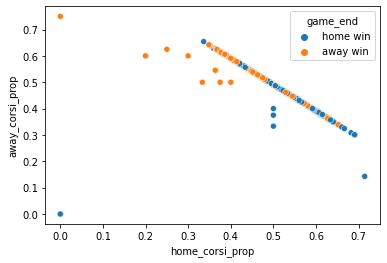

In [91]:
sns.scatterplot(data=games, x='home_corsi_prop', y='away_corsi_prop', hue='game_end')

<AxesSubplot:xlabel='home_fenwick_prop', ylabel='away_fenwick_prop'>

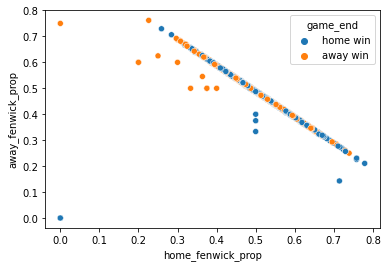

In [94]:
sns.scatterplot(data=games, x='home_fenwick_prop', y='away_fenwick_prop', hue='game_end')

<AxesSubplot:xlabel='home_corsi_prop', ylabel='away_fenwick_prop'>

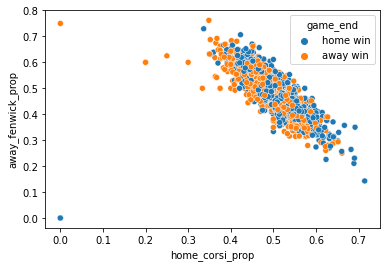

In [95]:
sns.scatterplot(data=games, x='home_corsi_prop', y='away_fenwick_prop', hue='game_end')

<AxesSubplot:xlabel='home_fenwick_prop', ylabel='away_corsi_prop'>

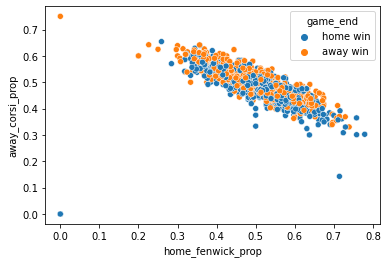

In [96]:
sns.scatterplot(data=games, x='home_fenwick_prop', y='away_corsi_prop', hue='game_end')

<AxesSubplot:xlabel='home_corsi_prop', ylabel='away_corsi_prop'>

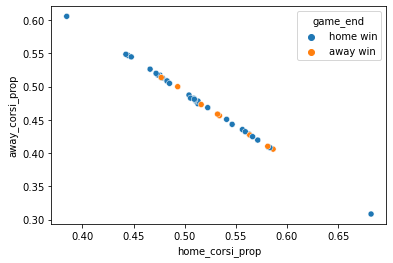

In [61]:
sns.scatterplot(data = games[games['home_team']=='Boston Bruins'], x='home_corsi_prop', y='away_corsi_prop', hue='game_end')

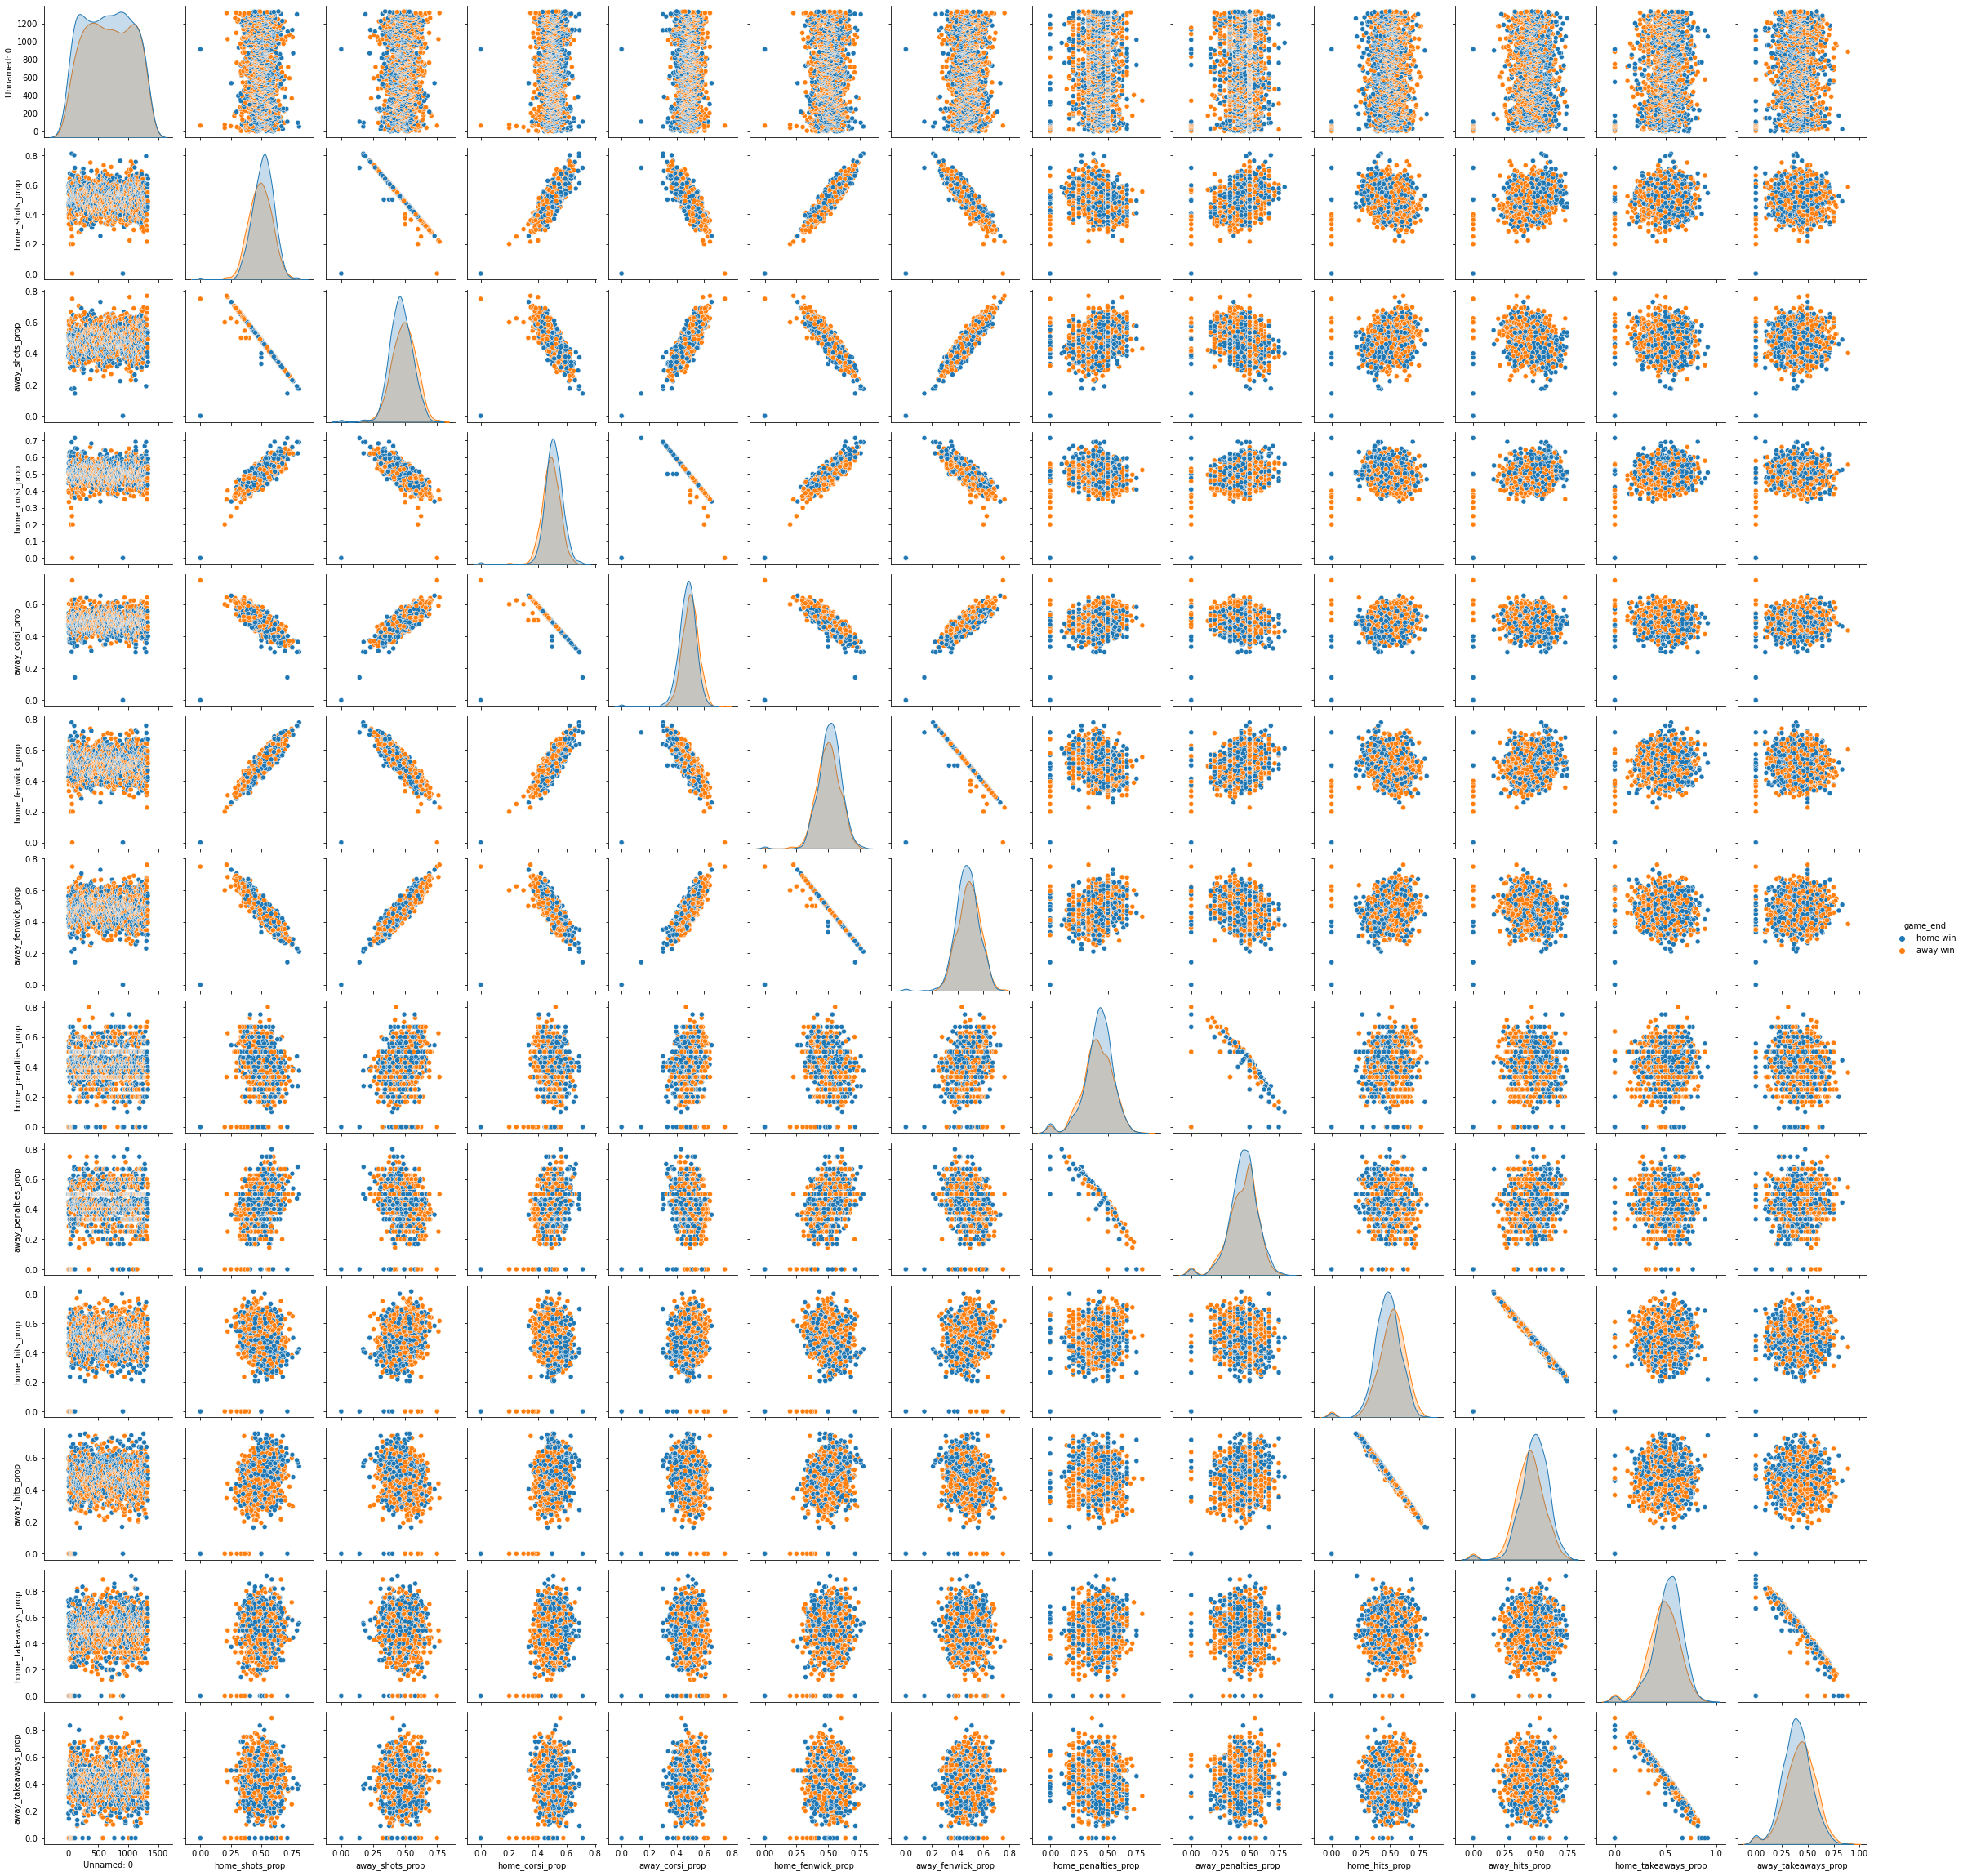

In [3]:
sns.pairplot(games, hue='game_end')

In [4]:
def pick_initial_centroids(df, k):
    return df.sample(k)

def update_centroids(features, centroids):
    dist = cdist(features, centroids)
    closest =  np.argmin(dist, axis=1)
    df = features.copy()
    df['cluster'] = closest
    return df.groupby('cluster').mean()


def kmeans(features, k):
    centroids = pick_initial_centroids(features, k)
    new_centroids = update_centroids(features, centroids)
    
    while not new_centroids.equals(centroids):
        centroids = new_centroids.copy()
        new_centroids = update_centroids(features, centroids)
        
    dist = cdist(features, centroids)
    closest =  np.argmin(dist, axis=1)
    df = features.copy()
    df['cluster'] = closest
    return df, centroids

In [5]:
clustered, centroids = kmeans(X_train, k=20)
clustered

home_shots_prop  away_shots_prop  home_corsi_prop  away_corsi_prop  \
464          0.530303         0.454545         0.513043         0.478261   
1005         0.437500         0.546875         0.500000         0.491071   
748          0.333333         0.650794         0.404959         0.586777   
1108         0.716981         0.264151         0.587629         0.402062   
187          0.419355         0.564516         0.475000         0.516667   
...               ...              ...              ...              ...   
763          0.544118         0.441176         0.550725         0.442029   
835          0.506494         0.480519         0.516393         0.475410   
1216         0.519481         0.467532         0.543860         0.447368   
559          0.530612         0.448980         0.537037         0.453704   
684          0.522388         0.462687         0.533333         0.457143   

      home_fenwick_prop  away_fenwick_prop  home_penalties_prop  \
464            0.526316           0.463158             0.444444   
1005           0.416667           0.571429             0.333333   
748            0.380952           0.607143             0.636364   
1108           0.626667           0.360000             0.333333   
187            0.406593           0.582418             0.428571   
...                 ...                ...                  ...   
763            0.510000           0.480000             0.400000   
835            0.509804           0.480392             0.333333   
1216           0.542553           0.446809             0.444444   
559            0.537500           0.450000             0.428571   
684            0.556818           0.431818             0.285714   

      away_penalties_prop  home_hits_prop  away_hits_prop  \
464              0.444444        0.565789        0.421053   
1005             0.500000        0.562500        0.416667   
748              0.272727        0.609756        0.365854   
1108             0.583333        0.387097        0.580645   
187              0.428571        0.371795        0.615385   
...                   ...             ...             ...   
763              0.400000        0.444444        0.539683   
835              0.500000        0.406250        0.562500   
1216             0.500000        0.309524        0.666667   
559              0.428571        0.384615        0.589744   
684              0.571429        0.500000        0.480000   

      home_takeaways_prop  cluster  
464              0.285714        9  
1005             0.388889       11  
748              0.000000       11  
1108             0.590909       12  
187              0.722222        8  
...                   ...      ...  
763              0.285714        9  
835              0.476190       10  
1216             0.400000       16  
559              0.363636       16  
684              0.428571        3  

[999 rows x 12 columns]

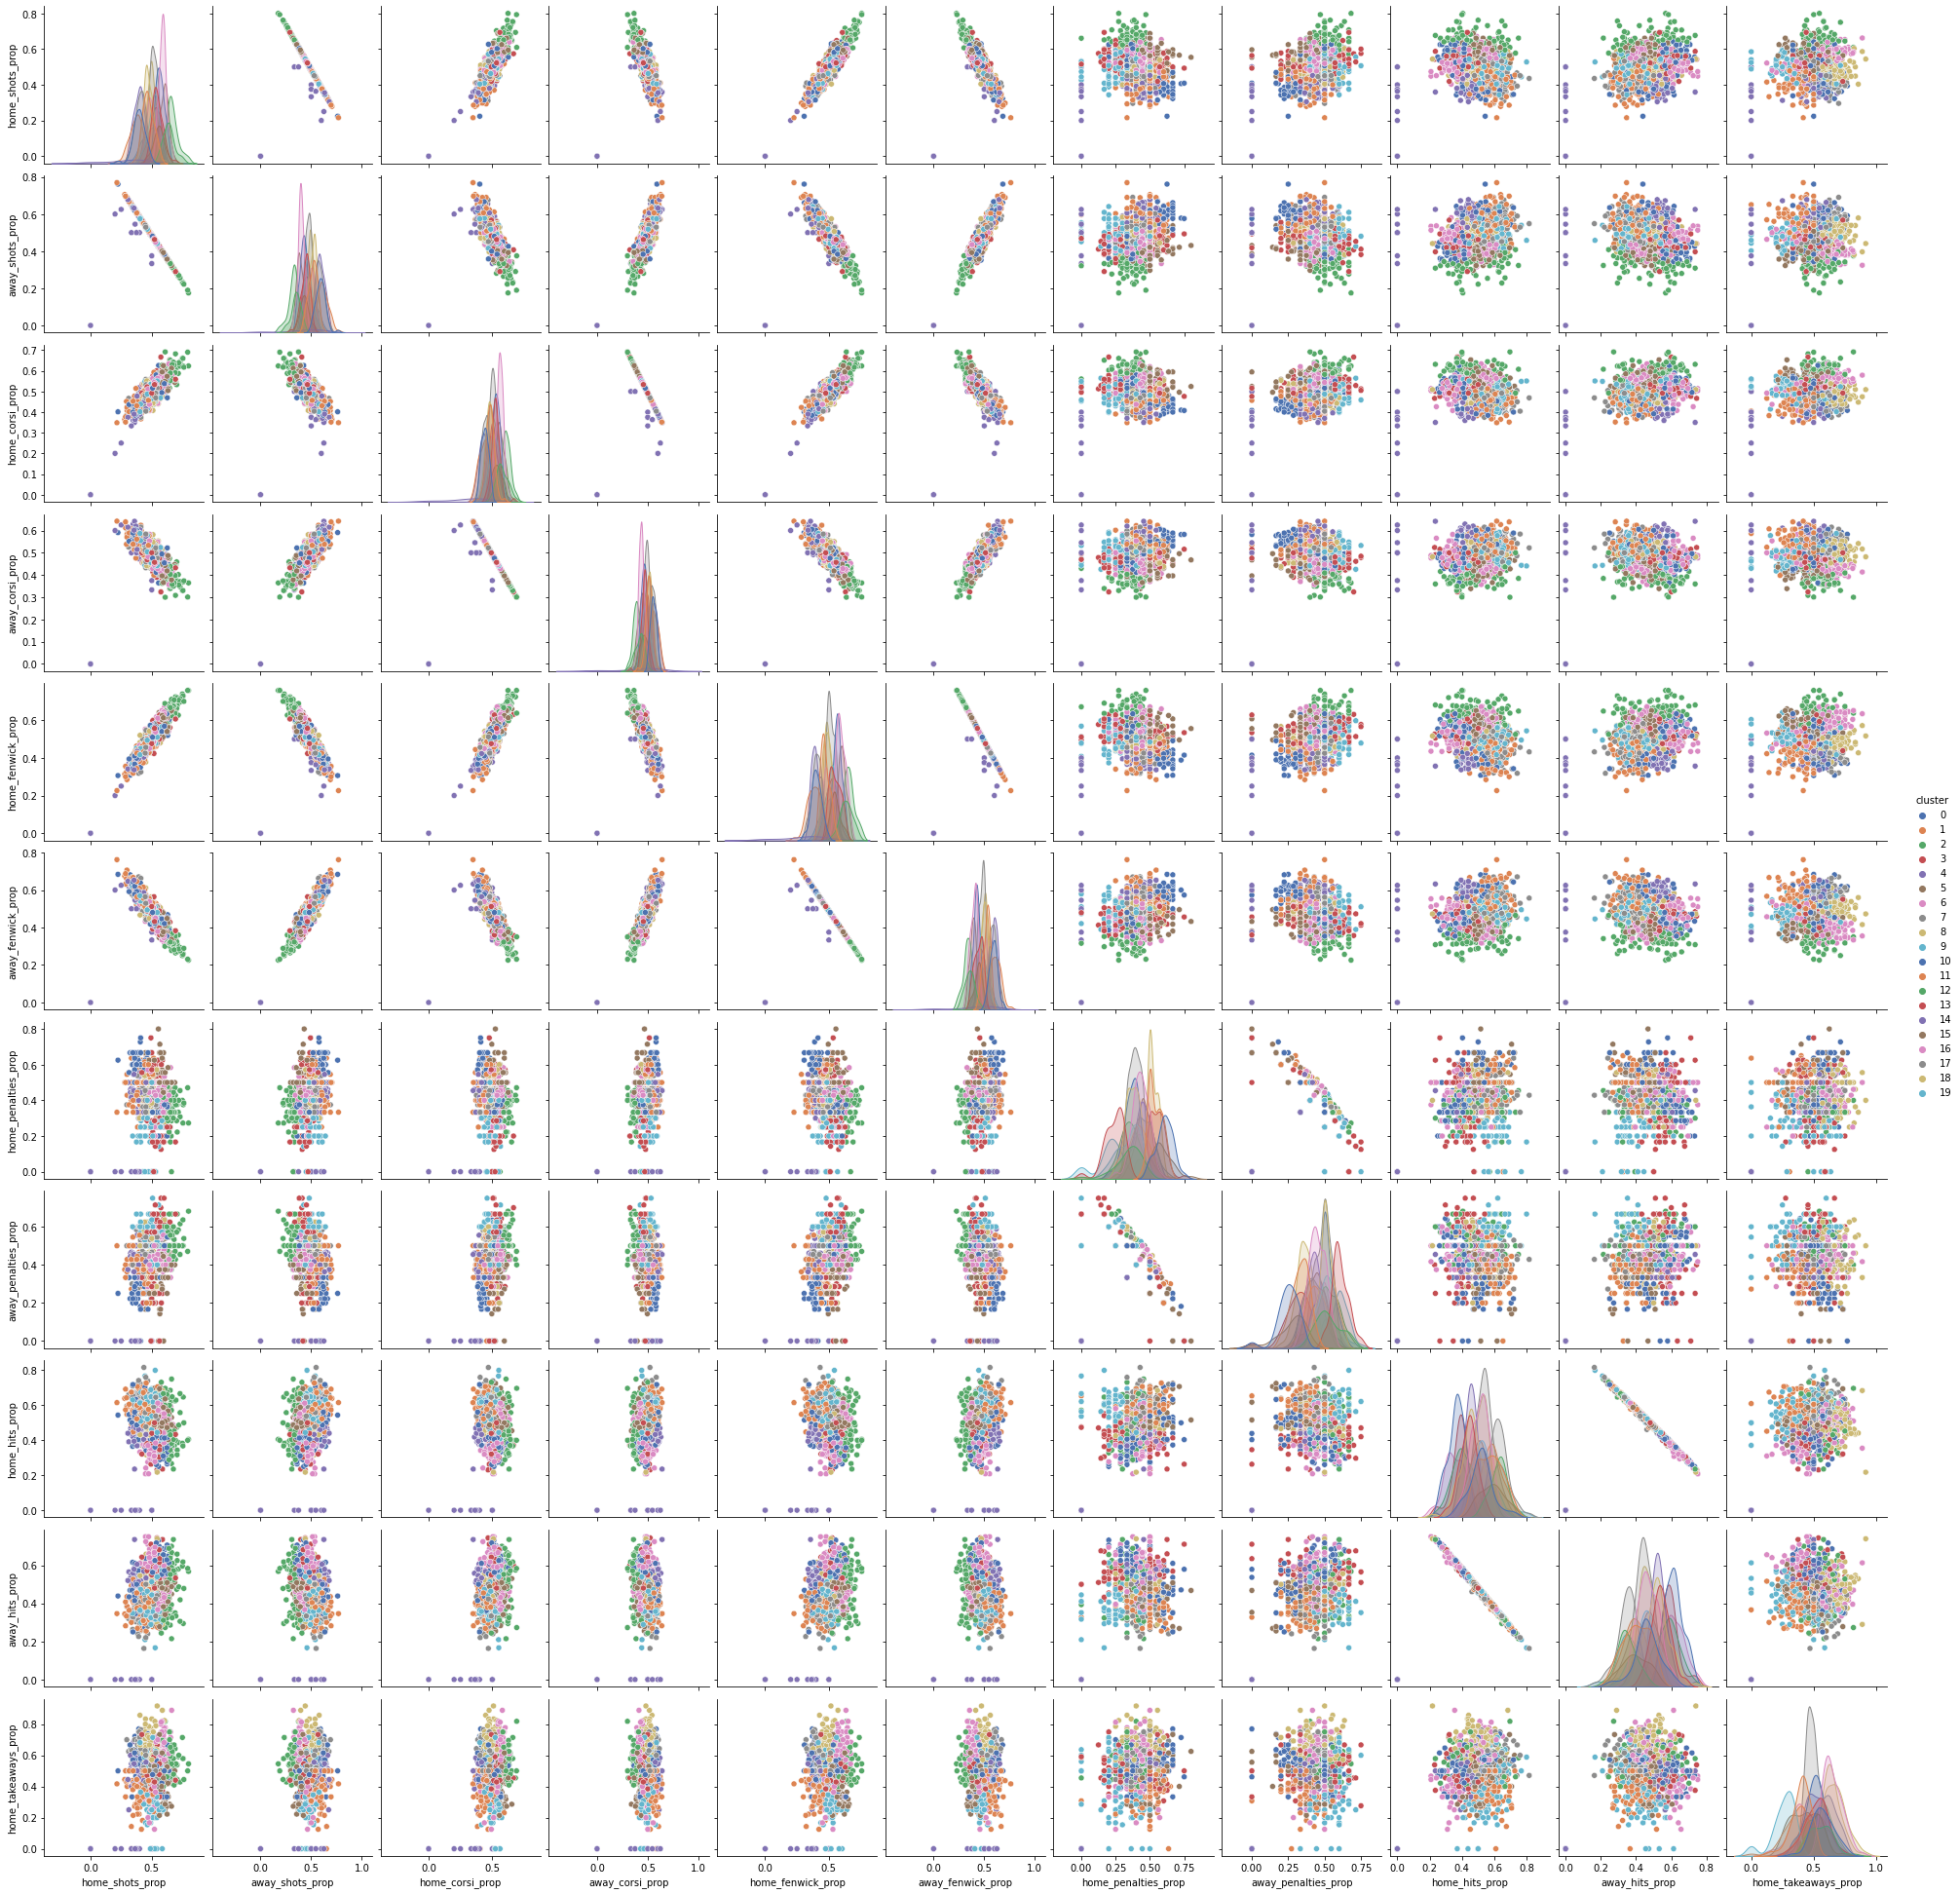

In [6]:
sns.pairplot(clustered, hue='cluster' , palette='deep')

In [7]:
def wcss(clustered):
    # Step 1 - find the centroids
    centroids = clustered.groupby('cluster').mean()
    # Step 2 - compute distances to each centroid, but extract, the distance for the assigned cluster
    wcss = cdist(clustered.iloc[:, :11], centroids)[np.arange(len(clustered)), clustered.iloc[:,-1]].sum()
    return wcss

wcss(clustered)

170.96245129159652

In [13]:
wcss_scores = [wcss(kmeans(X_train, k)) for k in range(1, 50)]

plt.figure(figsize=(5,3), dpi=200)
plt.plot(wcss_scores, marker='X')
plt.grid()
plt.ylabel('WCSS')
plt.xlabel('K')

AttributeError: 'tuple' object has no attribute 'groupby'

In [11]:
def classify_cluster(df, k):
    home = len(df[(df['cluster'] == k) & (df['game_end'] == 'home win')])
    away = len(df[(df['cluster'] == k) & (df['game_end'] == 'away win')])
    if home > away:
        return 'home win'
    else:
        return 'away win'

In [9]:
def predict(X_train, y_train, X_test, k):
    clustered, centroids = kmeans(X_train, k=k)
    clustered = clustered.join(y_train)
    dist = cdist(X_test, centroids)
    closest = np.argmin(dist, axis=1)
    df = X_test.copy()
    df['cluster'] = closest
    df['prediction'] = df.apply(lambda x: classify_cluster(clustered, x['cluster']), axis=1)
    return df['prediction']

def metrics(y, ypred):
    unique_classes = set(y) | set(ypred)
    n_classes = len(unique_classes)
    matrix = np.zeros(shape=(n_classes, n_classes), dtype=int)
    actual_prediction = list(zip(y, ypred))
    correct = 0
    for i,j in actual_prediction:
        if i == j:
            correct += 1
    return correct / len(actual_prediction)


Text(0.5, 0, 'K')

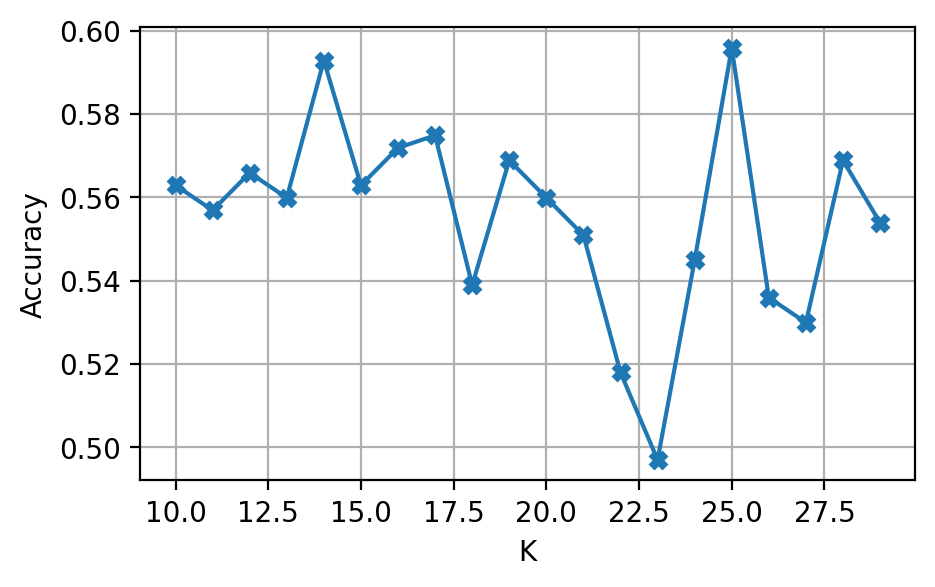

In [12]:
accuracies = [metrics(y_test, predict(X_train, y_train, X_test, k=k)) for k in range(10, 30)]

plt.figure(figsize=(5,3), dpi=200)
plt.plot(list(range(10, 30)), accuracies, marker='X')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('K')